<a href="https://colab.research.google.com/github/makhijakabir/assignments-ml/blob/main/ML_Tutorial_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Machine Learning Tutorial 01

###The following table shows the results of a recently conducted study on the correlation of the number of hours spent driving with the risk of developing acute backache. Find the equation of the best fit line for this data.

---

<br>

###Instructions:<br>
1. find independent variable and dependent variable in given dataset.<br>
2. implement linear regression in Colab.<br>
3. Find regression line that best predicts value of dependent variable.<br> 
4. Find SST, SSE, SSR and co-efficient of determination (R2).<br>
5. Explain pictorial relationship between SST, SSE, SSR.<br>
6. Decide whether regression equation is good fit or not for the given sample data




##Imports

In [47]:
import pandas as pd
from pandas import DataFrame
import numpy as np

import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

%matplotlib inline

##Instruction 1

###Data Pre-Processing

In [6]:
data = pd.read_csv('/content/dataTut01 - Sheet1.csv')
data

,No. of hours spent driving (x),Risk Score on a Scale of 0-100 (y)
0,10,95
1,9,80
2,2,10
3,15,50
4,10,45
5,16,98
6,11,38
7,16,93


In [7]:
data.describe()

,No. of hours spent driving (x),Risk Score on a Scale of 0-100 (y)
count,8.000000,8.000000
mean,11.125000,63.625000
std,4.673252,32.429869
min,2.000000,10.000000
25%,9.750000,43.250000
50%,10.500000,65.000000
75%,15.250000,93.500000
max,16.000000,98.000000


###Determining which one is the dependent variable

From the above dataset it is very well evident that 'y' is the dependent variable, since it is a score of how severe the pain can turn out to be after driving 'x' number of hours, therefore, it is safe to say that 'y' is dependent on 'x' and exhibits a linear relationship.

##Insruction 2

In [8]:
x = DataFrame(data, columns = ['No. of hours spent driving (x)'])
y = DataFrame(data, columns = ['Risk Score on a Scale of 0-100 (y)'])

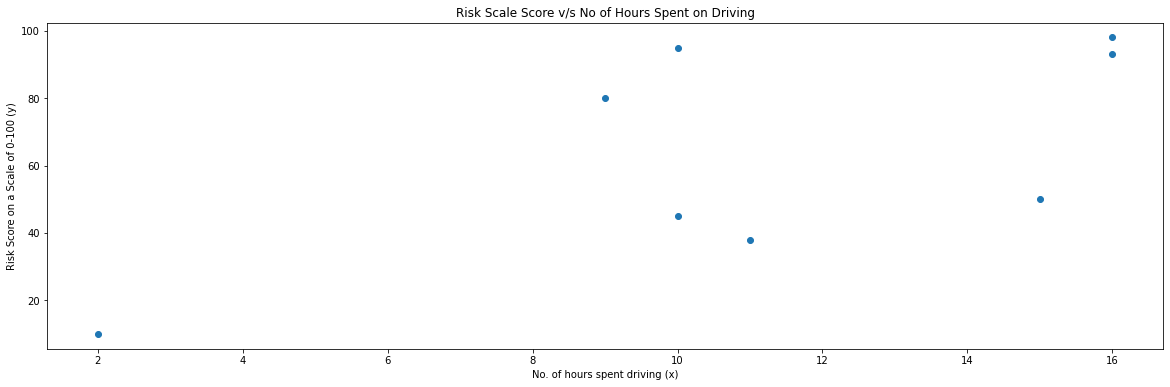

In [12]:
plt.figure(figsize=(20, 6))
plt.title('Risk Scale Score v/s No of Hours Spent on Driving')
plt.scatter(x, y) 
plt.xlabel('No. of hours spent driving (x)')
plt.ylabel('Risk Score on a Scale of 0-100 (y)')
plt.show()

In [21]:
regression = LinearRegression()

In [28]:
xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size=0.2, random_state=101)

In [29]:
regression.fit(xTrain, yTrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [30]:
regression.coef_

array([[4.11803279]])

In [31]:
regression.intercept_

array([14.4852459])

##Instruction 3

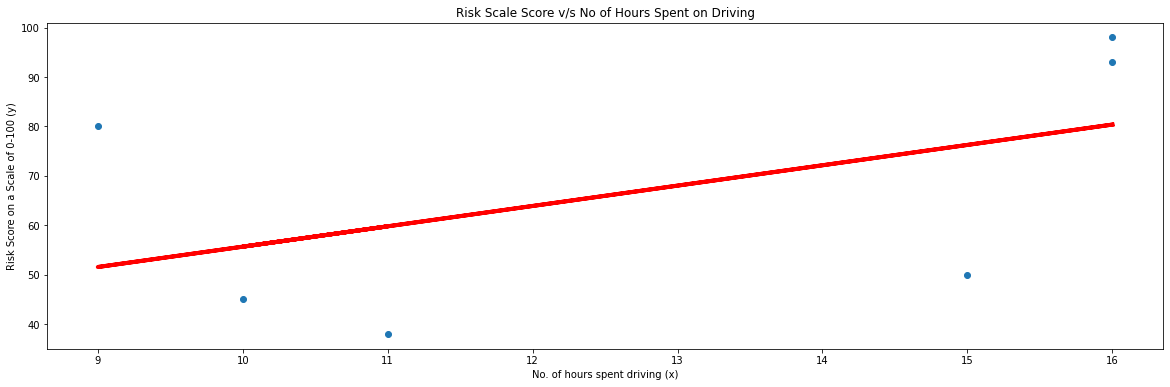

In [32]:
plt.figure(figsize=(20, 6))
plt.title('Risk Scale Score v/s No of Hours Spent on Driving')
plt.scatter(xTrain, yTrain)
plt.plot(xTrain, regression.predict(xTrain), color='red', linewidth=4)
plt.xlabel('No. of hours spent driving (x)')
plt.ylabel('Risk Score on a Scale of 0-100 (y)')
plt.show()

##Instruction 4

In [44]:
yTrain

,Risk Score on a Scale of 0-100 (y)
5,98
4,45
6,38
1,80
3,50
7,93


In [90]:
mean = int(y.mean())
yList = np.reshape(yTrain.to_numpy(), 6)

sumSST = ((yList - mean)**2).sum()

print('The SST (Sum of Squares Total) for the above linear regession model is:', sumSST)

The SST (Sum of Squares Total) for the above linear regession model is: 3532


In [78]:
mean = int(y.mean())

predictedVals = regression.predict(xTest)
predictedFinal = np.reshape(predictedVals, 2)

sumSSR = int(((predictedFinal - mean)**2).sum())

print('The SSR (Sum of Squares due to Regression) for the above linear regession model is:', sumSSR)

The SSR (Sum of Squares due to Regression for the above linear regession model is: 1676


In [79]:
print('The SSR (Sum of Squares Error) for the above linear regession model is:', sumSST - sumSSR)

The SSR (Sum of Squares Error) for the above linear regession model is: 1856


In [84]:
r2 = 1 - (sumSSR/sumSST)
print('The r^2 value for the above linear regression model calculated through the formula is:', r2)
print('The r^2 value for the above linear regression model calculated through LinearRegression is:', metrics.r2_score(yTest, predictedFinal))

The r^2 value for the above linear regression model calculated through the formula is: 0.5254813137032843
The r^2 value for the above linear regression model calculated through LinearRegression is: 0.5269124283850473


##Instruction 5

###SST
The sum of squares total, denoted SST, is the squared differences between the observed dependent variable and its mean. You can think of this as the dispersion of the observed variables around the mean – much like the variance in descriptive statistics. It is a measure of the total variability of the dataset.<br><br>

###SSR
The second term is the sum of squares due to regression, or SSR. It is the sum of the differences between the predicted value and the mean of the dependent variable. Think of it as a measure that describes how well our line fits the data.If this value of SSR is equal to the sum of squares total, it means our regression model captures all the observed variability and is perfect. Once again, we have to mention that another common notation is ESS or explained sum of squares.<br><br>

##SSE
The last term is the sum of squares error, or SSE. The error is the difference between the observed value and the predicted value. We usually want to minimize the error. The smaller the error, the better the estimation power of the regression. Finally, I should add that it is also known as RSS or residual sum of squares. Residual as in: remaining or unexplained.

##Instruction 6

In [107]:
regression.score(x, y)

0.42048450214956035

The r2 score for the complete model turns out to be ~0.42, therefore, according to Falk and Miller the model score should be more than or equal to 0.10 for a successful model, thus, accordin to these researchers in 1902 our model is successful. <br><br>

If we were to consider Chin in 1998 who recommended that an r2 score of 0.33 or less renders a model moderate, then our model is rendered to be moderate in it's results.